# Marine Heatwaves in the Med Sea

A temporale analysis

Simon Oiry\[^11\] [](https://orcid.org/0000-0001-7161-5246) (Institut des Substances et Organismes de la Mer, ISOMer, Nantes Université, UR 2160, F-44000 Nantes, France, Consiglio Nazionale delle Ricerche, Istituto di Scienze Marine (CNR-ISMAR), 00133 Rome, Italy)  
Maria Laura Zoffoli\[^12\] [](https://orcid.org/0000-0003-1892-0051) (Consiglio Nazionale delle Ricerche, Istituto di Scienze Marine (CNR-ISMAR), 00133 Rome, Italy)  
Laurent Barillé\[^13\] [](https://orcid.org/0000-0001-5138-2684) (Institut des Substances et Organismes de la Mer, ISOMer, Nantes Université, UR 2160, F-44000 Nantes, France)  
July 11, 2025

TBD

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attachement du package : 'tidyterra'

L'objet suivant est masqué depuis 'package:stats':

    filter

terra 1.8.50

Attachement du package : 'terra'

L'objet suivant est masqué depuis 'package:tidyr':

    extract


Attachement du package : 'patchwork'

L'objet suivant est masqué depuis 'package:terra':

    area


Attachement du package : 'gridExtra'

L'objet suivant est masqué depuis 'package:dplyr':

    combine


Attachement du package : 'ggrastr'

L'objet suivant est masqué depuis 'package:terra':

    rasterize

Le chargement a nécessité le package : cowplot

Attachement du package : 'cowplot'

L'objet suivant est masqué depuis 'package:patchwork':

    align_plots

L'objet suivant est masqué depuis 'package:lubridate':

    stamp

Le chargement a nécessité le package : magrittr

Attachement du package : 'magrittr'

Les objets suivants sont masqués depuis 'package:terra':

    extract, inset

L'objet suivant est masqué depuis 'package:purrr':

    set_names

L'objet suivant est masqué depuis 'package:tidyr':

    extract

# Introduction

Marine heatwaves (MHWs) are discrete and prolonged periods of anomalously high sea temperatures that significantly exceed historical baseline conditions. Specifically, a marine heatwave is generally defined as an event lasting five or more consecutive days during which sea temperatures exceed the 90th percentile threshold based on a 30-year historical climatological period (@fig-HW_explain). These events can vary in terms of duration, intensity, and spatial extent, making a flexible yet rigorous approach necessary for accurate characterization and comparison.

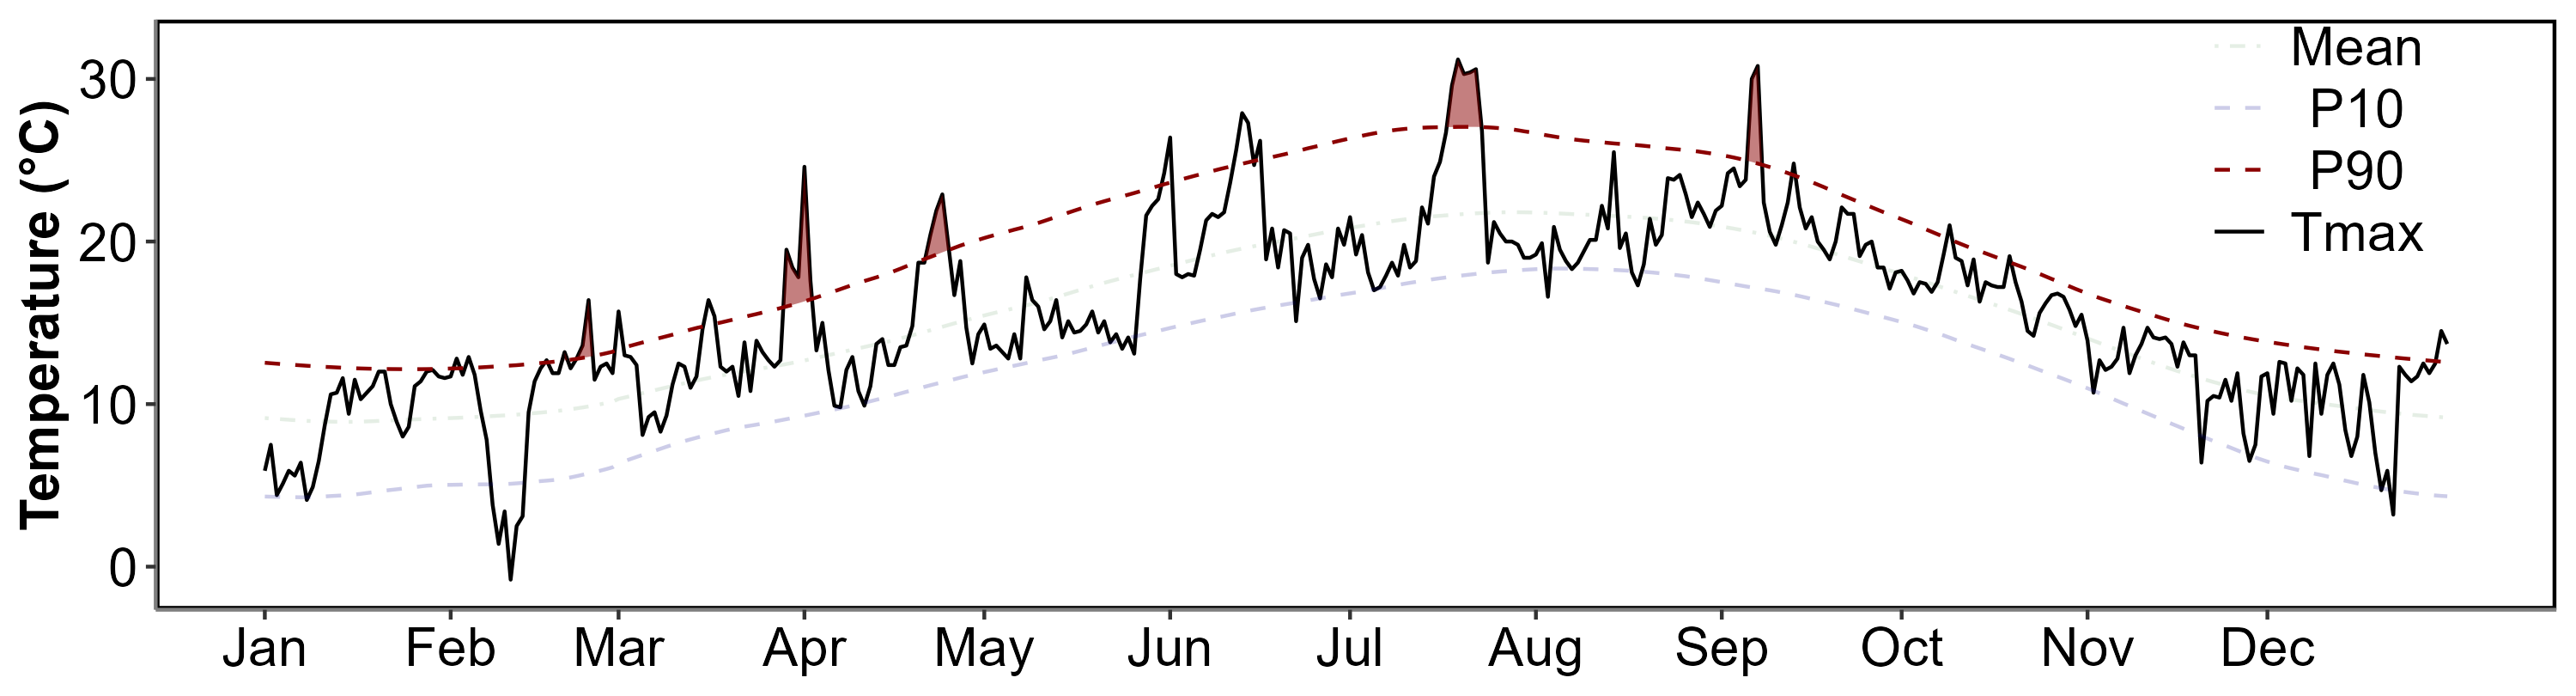

In [ ]:
knitr::include_graphics("Figs/plot_Tmax_flame.png")

The importance of studying marine heatwaves arises from their profound ecological and socioeconomic impacts. They have been associated with widespread disruptions to marine ecosystems, including shifts in species distribution, local extinctions, significant mortality events, and changes in primary productivity. Such ecological disturbances subsequently affect fisheries, aquaculture, and biodiversity, highlighting the broad-reaching implications of these events.

The Mediterranean Sea, characterized as a climate change hotspot, has witnessed an increased frequency and intensity of marine heatwaves, especially over recent decades. Mediterranean MHWs often coincide with atmospheric heatwaves, further exacerbating their intensity and ecological impacts. Concurrent atmospheric and marine heatwaves amplify sea surface temperature anomalies, leading to intense ocean stratification and extensive ecological disruption, including mass mortalities of benthic invertebrates and seagrass decline.

In the Mediterranean, particularly in the Adriatic Sea, studies have documented variable responses of primary productivity to MHW events. In coastal and eutrophic regions, such as areas influenced by riverine nutrient input, MHWs have resulted in increased phytoplankton biomass. Conversely, offshore and oligotrophic regions typically exhibit reduced chlorophyll-a concentrations during heatwaves, indicating a potential decline in phytoplankton productivity. Such spatial heterogeneity emphasizes the complexity of ecological responses and underscores the importance of localized assessments.

Understanding marine heatwaves, particularly in sensitive regions like the Mediterranean Sea, is crucial for developing informed management strategies aimed at mitigating their ecological and socioeconomic consequences. This necessity is heightened by projections indicating further increases in MHW frequency, duration, and intensity, driven by ongoing climate change.

# Material & Methods

Daily Sea Surface Temperature (SST) time series for the Mediterranean Sea, spanning from 1982 onwards, were obtained from the Copernicus Marine Environment Monitoring Service (CMEMS) platform \[@Copernicus_Sentinel; @pisano2016new; @embury2024satellite\]. Heatwave events were detected using the HeatwaveR package in R \[@heatwaveR\], adhering to the marine heatwave definition provided by @hobday2016hierarchical and @hobday2018categorizing.

To establish a reference climatology, the first 30 years of the dataset were utilized for each pixel within the Mediterranean Sea. Daily SST values were subsequently compared against this baseline climatology. A heatwave event was identified whenever the daily SST exceeded the 90th percentile of the corresponding climatological distribution. Additionally, consecutive events separated by fewer than two days were merged and treated as a single continuous heatwave event.

Results are presented as annual maps of key heatwave metrics: the total number of days classified as heatwave, the number of distinct heatwave events, and the cumulative intensity of these events, defined as the sum of daily SST exceedances above the climatological 90th percentile threshold.

In [ ]:
library(sf)
library(ggplot2)
library(rnaturalearth)
library(rnaturalearthdata)
library(tidyverse)

# Load your shapefile (replace with your path)
med_regions <- st_read("Data/mask_Med_Sea/RegionMedSea.shp") %>% 
  dplyr::filter(!str_detect(name, "Black"))

# Get world land polygons
world <- ne_countries(scale = "large", returnclass = "sf")

# Plot
plot_medsea <- ggplot() +
  # Plot land as grey
  geom_sf(data = world, fill = "grey80", color = NA) +
  # Plot Mediterranean regions, each with a different color
  geom_sf(data = med_regions, aes(fill = name), color = "black", alpha = 0.8) +
  # Customize colors
  scale_fill_viridis_d(name = "",option = "turbo") +
  # Coordinate limits to focus on Mediterranean
  coord_sf(xlim = c(-10, 40), ylim = c(30, 47), expand = FALSE) +
  # Customize theme
  theme_minimal(base_size = 18) +
  theme(
    panel.grid = element_line(color = "gray90"),
    panel.background = element_rect(fill = "aliceblue"),
    plot.background = element_rect(fill = "white",color = NA),
    legend.text = element_text(size = 13),
    legend.position = "top"
  )

ggsave("Manuscript/Figs/Map_MedSea.png", plot_medsea, dpi = 300, height =645*3, width = 1319*3, units = "px")

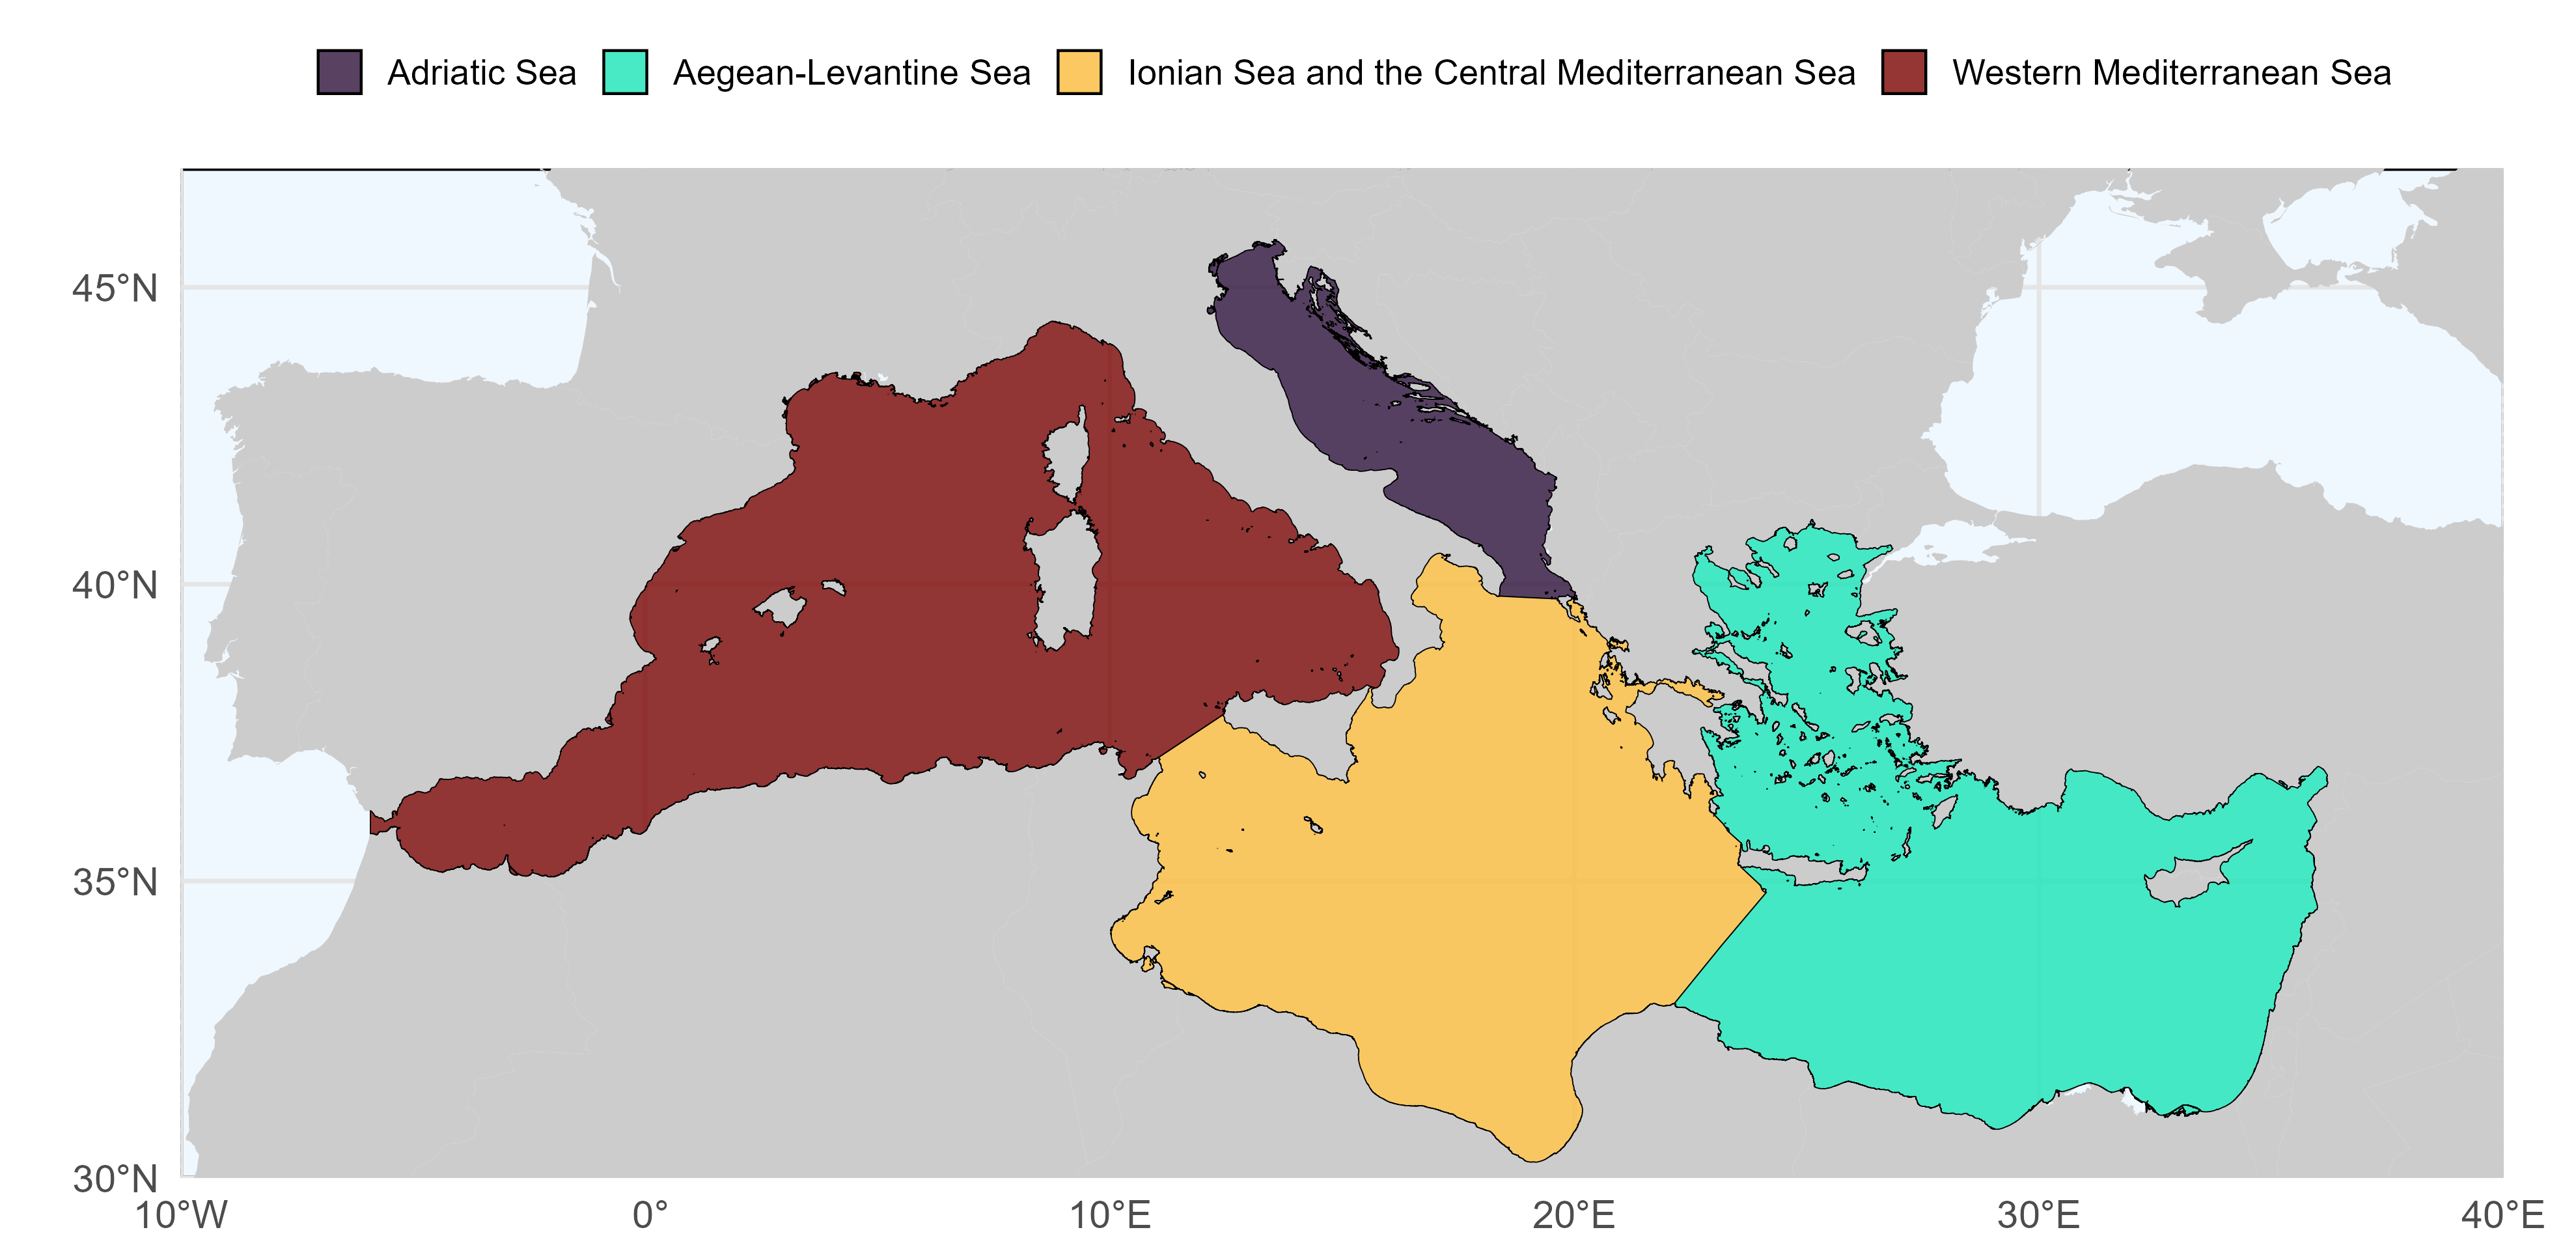

In [ ]:
knitr::include_graphics("Figs/Map_MedSea.png")